# 2. Análisis Exploratorio de Datos (EDA)

Esta etapa nos permitirá comprender mejor la distribución de las variables, identificar patrones, relaciones entre características, y posibles diferencias entre los grupos de estudio. El objetivo es obtener información relevante que nos oriente en la construcción y evaluación de los modelos predictivos.

### 2.1. Carga de los datos

Para empezar, necesitamos cargar los datos. Para que este notebook lo pueda usar cualquiera sin descargar archivos manualmente, hemos subido el datastet a GitHub, donde solo es necesario obtener el `raw` de donde reposa el archivo. Así el proceso es automático y fácil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/luispenaranda08/Credit-Score-Classsification-w-Machine-Learning/refs/heads/Luis/train.csv')

### 2.2. Análisis de los datos

En esta sección inspeccionamos las primeras filas y el tipo de variables. Esta información nos permite identificar posibles problemas de calidad de los datos y tomar decisiones informadas sobre el preprocesamiento.


Ahora que los datos están cargados, vamos a hacer una revisión rápida para empezar a conocer los datos.

In [3]:
pd.set_option('display.max_columns', None) #Para mostrar todas las columnas del head()

In [4]:
print("\nVista previa del DataFrame:")
df.head()



Vista previa del DataFrame:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [6]:
print("Resumen técnico del DataFrame:")
df.info()

Resumen técnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan  

En la primera etapa de nuestro Análisis Exploratorio de Datos (EDA), examinamos la estructura general del conjunto de datos.

-   **Tamaño del conjunto de datos:** Descubrimos que el conjunto de datos contiene 100,000 registros y 27 variables.
-   **Tipos de datos:** Encontramos que las variables se dividen en tipos numéricos (`float64`, `int64`) y categóricos (`object`). 
-   **Valores faltantes:** Un hallazgo crucial es la presencia de valores nulos o faltantes en varias columnas. 


#### 2.2.1 Corrección de los datos

Si analizamos más a detalle la salida del `.info()` que acabamos de ver, notaremos que variables como `Age`, `Annual_Income` o `Num_of_Loan` se encuentran registradas como tipo `object` en vez de ser tipo entero o flotante. Esto se debe a que gran parte de las variables cuentan con errores en el registro de sus datos que debe ser corregido antes de comenzar a analizarlos.

Los siguientes códigos de esta sección, entonces, serán implementados con el objetivo de corregir todos estos registros erróneos en las variables que encontramos que los tenían.

Antes que nada, eliminemos las variables que no serán utilizadas en proyecto.

In [7]:
df=df.drop(columns=["ID","Customer_ID", "Name", "SSN", "Month"])

Comprobemos que se hayan eliminado correctamente:

In [8]:
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Primero, corregimos los registros de las variables que observamos que tienen símbolos que no deberían estar en una variable numérica:

In [9]:
int_cols=["Age", "Annual_Income","Num_of_Loan", "Num_of_Delayed_Payment","Outstanding_Debt" ]

In [10]:
for col in int_cols:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

    

Luego, observamos que para la variable `Occupation`, los valores faltantes se registraron así: `_______`, por lo que los convertimos en `NA`.

In [11]:
print(df["Occupation"].value_counts())

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


In [12]:
df["Occupation"]=df["Occupation"].replace("_______", np.nan)

Como se pudo ver en el `.head()`, la variable `Type_of_Loan` contiene los tipos de créditos solicitados por cada cliente. En total se tienen 9 tipos de créditos (contando los que no fueron específicados como uno solo), entonces cada registro tenía la combinación específica de cada tipo de crédito del cliente, lo que a la larga termina dando una lista de combinaciones posibles muy grande y poco eficiente al momento de entrenar los modelos.

Por esto, decidimos definir 9 variables binarias, que marquen si el cliente solicitó el tipo de crédito de la variable en específico o no.

Las variables son:
- `Not Specified`
- `Credit-Builder Loan`
- `Personal Loan`
- `Debt Consolidation Loan`
- `Student Loan`
- `Payday Loan`
- `Mortgage Loan`
- `Auto Loan`
- `Home Equity Loan`

In [13]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(r'\s*,\s*', ',', regex=True)


In [14]:
loan_types = [
    'Not Specified',
    'Credit-Builder Loan',
    'Personal Loan',
    'Debt Consolidation Loan',
    'Student Loan',
    'Payday Loan',
    'Mortgage Loan',
    'Auto Loan',
    'Home Equity Loan'
]

Dado que la variable `Type_of_Loan` cuenta con valores faltantes, decidimos realizar una imputación temprana para poder registrar correctamente las variables nuevas.

Para esto, de la clase de Visualización de datos, tomamos el método de imputación de categóricas `hot_deck`, el cual sustituye con uno tomado al azar de registros similares.

In [15]:
def hot_deck_group(df, col, group, random_state=42):
    rng = np.random.default_rng(random_state)
    out = df[col].copy()
    for g, sub in df.groupby(group):
        pool = sub[col].dropna().to_numpy()
        idx = sub.index[sub[col].isna()]
        if pool.size > 0 and len(idx) > 0:
            out.loc[idx] = rng.choice(pool, size=len(idx), replace=True)
    return out


In [16]:
df_imp = df.copy()

In [17]:
df_imp['Type_of_Loan'] = hot_deck_group(df_imp, 'Type_of_Loan', 'Credit_Mix')

Además, haciendo uso de la función `eval_cat`, evaluamos por medio de una prueba de chi-cuadrado si la imputación hecha no cambia la distribución de la variable imputada.

In [18]:
from scipy.stats import chi2_contingency
def eval_cat(df,df_imputado, var):    
    orig_counts = df[var].value_counts().sort_index()
    imp_counts = df_imputado[var].value_counts().sort_index()

    
    orig_counts, imp_counts = orig_counts.align(imp_counts, fill_value=0)

    tabla = pd.DataFrame({"original": orig_counts, "imputada": imp_counts}).T

    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"=== {var} ===")
    print(f"Chi2 = {chi2:.3f}, gl = {dof}, p = {p:.4f} → ",
          "No se rechaza H0 (distribuciones iguales)" if p > 0.05 else "Se rechaza H0 (distribuciones diferentes)")
    print("-"*60)

In [19]:
eval_cat(df,df_imp, 'Type_of_Loan')

=== Type_of_Loan ===
Chi2 = 400.955, gl = 6259, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


Dado que el p-valor de la prueba chi-cuadrado es mayor que el nivel de significancia (0.05), no existe evidencia suficiente para rechazar la hipótesis de igualdad de las distribuciones.

Ahora, revisamos que se haya imputado la variable, es decir, que ya no existan valores faltantes.

In [20]:
df["Type_of_Loan"].isna().sum()

11408

In [21]:
df_imp["Type_of_Loan"].isna().sum()

0

Dado que la imputación se realizó correctamente y es estadísticamente válida, la guardamos en el dataframe original.

In [22]:
df["Type_of_Loan"]=df_imp["Type_of_Loan"]

Y procedemos con la creación de las variables binarias.

In [23]:
for loan in loan_types:
    df[loan] = df['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

Como ya no necesitamos la información de `Type_of_Loan`, la retiramos del análisis para evitar la repetición de la misma información.

In [24]:
df.drop(columns=["Type_of_Loan"], inplace=True)

Además, recordemos que contamos con la variable `Num_of_Loan`, que cuenta el número de créditos solicitados por el cliente, pero al tener las variables binarias que cuentan con la misma información, también puede ser retirada del análisis.

In [25]:
df.drop(columns=["Num_of_Loan"], inplace=True)

En el caso de la variable `Credit_Mix`, el registro `_` nos indica que no hubo información del cliente, por lo que creamos una categoría llamada `Not Specified` para dejarlo más claro.

In [26]:
print(df["Credit_Mix"].value_counts())
df["Credit_Mix"]=df["Credit_Mix"].replace("_", "Not Specified")
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64


Credit_Mix
Standard         36479
Good             24337
Not Specified    20195
Bad              18989
Name: count, dtype: int64

In [27]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

Para `Payment_Behaviour`, se tiene un claro error en el registro de una de las categorías, por lo que lo cambiamos a valor faltante.

In [28]:
df["Payment_Behaviour"].value_counts()
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8", np.nan)

Y para las variables `Changed_Credit_Limit`, `Amount_invested_monthly` y `Monthly_Balance`, se realiza un proceso de corrección de errores en los registros, cambiando estos errores por un `0`.

Para `Changed_Credit_Limit`, se pone 0 ya que puede significar que el límite del crédito no sufrió cambios.

In [29]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",0)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)

Para `Amount_invested_monthly`, se pone 0 ya que este error puede significar que este cliente no invierte mensualmente.

In [30]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].replace("__10000__",0.0)
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)

Y para `Monthly_Balance` se puso como valor faltante los errores claros de registro.

In [31]:
df["Monthly_Balance"]=df["Monthly_Balance"].replace("__-333333333333333333333333333__",np.nan)
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)

Por último, decidimos cambiar el registro de la variable `Credit_History_Age`, para que en vez de dar los años y meses de vida crediticia del cliente escritos en texto, escriba su equivalente en número de años:

In [32]:

def credit_age_to_float(value):
    if pd.isna(value):
        return np.nan  # Mantiene los valores faltantes
    match = re.match(r"(\d+)\s*Years?\s*and\s*(\d+)\s*Months?", str(value))
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    return np.nan  # Si no coincide el patrón


df["Credit_History_Age"] = df["Credit_History_Age"].apply(credit_age_to_float).round(2)

Luego de estas correcciones, podemos seguir con el EDA.

#### 2.2.2 De regreso al análisis

Primero, limpiemos un poco los nombres de las variables:

In [33]:
import janitor
df=df.clean_names()

Ahora, veamos de nuevo la información del dataset con `.info()`.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  int64  
 1   occupation                92938 non-null   object 
 2   annual_income             100000 non-null  float64
 3   monthly_inhand_salary     84998 non-null   float64
 4   num_bank_accounts         100000 non-null  int64  
 5   num_credit_card           100000 non-null  int64  
 6   interest_rate             100000 non-null  int64  
 7   delay_from_due_date       100000 non-null  int64  
 8   num_of_delayed_payment    92998 non-null   float64
 9   changed_credit_limit      100000 non-null  float64
 10  num_credit_inquiries      98035 non-null   float64
 11  credit_mix                100000 non-null  object 
 12  outstanding_debt          100000 non-null  float64
 13  credit_utilization_ratio  100000 non-null  fl

De esta salida podemos concluir lo siguiente:



- **Los tipos de las variables** ya se encuentran relacionados con la variable como tal, por lo que tuvimos una importante reducción de las variables de tipo `object`. Decidimos conservar las variables binarias con tipo `int64`, creadas en la sección de corrección, ya que nos facilita dejarla registrada de esta manera al momento del entrenamiento de los modelos.
- Ahora contamos con **28 variables** predictoras y una variable objetivo: `credit_score`.
- Las variables `occupation`, `monthly_inhand_salary`, `num_of_delayed_payment`, `num_credit_inquiries`, `credit_history_age`, `amount_invested_monthly`, `payment_behaviour` y `monthly_balance` cuentan con valores faltantes. El análisis correspondiente a estos y su imputación serán realizados en la sección de imputación de datos faltantes.

Para continuar de manera mas sencilla con el análisis, hicimos una lista que contiene cada variable numérica por un lado, y cada variable categórica por otro:

In [35]:
num_cols=['age', 'annual_income','monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

cat_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour', 'not_specified',
          'credit_builder_loan','personal_loan','debt_consolidation_loan','student_loan',
          'payday_loan','mortgage_loan','auto_loan','home_equity_loan']

In [36]:
print("\nResumen de las variables numéricas:")
display(df[num_cols].describe().T)


Resumen de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,110.649700,6.862447e+02,-500.000000,24.000000,33.000000,42.000000,8.698000e+03
annual_income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
num_bank_accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
num_credit_card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,92998.0,30.923342,2.260319e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01
num_credit_inquiries,98035.0,27.754251,1.931773e+02,0.000000,3.000000,6.000000,9.000000,2.597000e+03


A partir de la tabla de estadísticas descriptivas (`describe()`), realizamos las siguientes observaciones:

1.  **Valores Faltantes (Nulos):**
    -   Confirmamos la presencia de valores faltantes en `monthly_inhand_salary`, `num_of_delayed_payment`, `num_credit_inquiries`, `credit_history_age`, `amount_invested_monthly` y `monthly_balance`.

2.  **Identificación de Datos Inconsistentes:**
    -   Descubrimos valores imposibles en algunas variables:
        - `age`,`num_bank_accounts`, `num_of_delayed_payment` y `changed_credit_limit` tienen valores mínimos negativos (-500, -1, -3 y -6.49, respectivamente), lo cual es un claro error de datos. Estos valores deberán ser eliminados o corregidos. Mientras que valores negativos en `delay_from_due_date` pueden indicar que el cliente pago con días de anticipación, por lo que no hace falta una corrección en esta.
    -   Observamos la distribución de otras variables:
        - Las variables `age`, `num_bank_account`, `interest_rate`, `num_credit_card`, `num_of_delayed_payment` y `num_credit_inquiries` tienen valores máximos imposibles, como una persona con 8698 años o una persona con 1798 cuentas bancarias. Estos valores atípicos que son un claro error en el registro de los datos serán tratados en la sección de datos atípicos.
        
En resumen, esta exploración inicial nos ha permitido confirmar los valores faltantes y, de manera crucial, identificar problemas de calidad en los datos como los valores negativos en la edad y el número de cuentas bancarias. Estos hallazgos serán prioritarios en la etapa de limpieza y preprocesamiento de los datos.

#### 2.2.3 Datos faltantes

Veamos ahora la cantidad de datos faltantes que tenemos por variable.

Además, tomaremos como `NA` los valores negativos de las variables `age`, `num_bank_accounts`, `num_of_delayed_payment` y `changed_credit_limit`.

In [37]:
neg_cols=['age','num_bank_accounts', 'num_of_delayed_payment', 'changed_credit_limit']
for col in neg_cols:
    for i in range(len(df)):
        if df[col][i] < 0:
            df[col][i] = np.nan

In [38]:
# Cálculo de valores nulos y su porcentaje
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Faltantes': missing,
    'Porcentaje (%)': missing_percent
})

# Mostrar solo las columnas con datos faltantes
missing_df = missing_df[missing_df['Faltantes'] > 0].sort_values(by='Faltantes', ascending=False)

print("\n⚠️ Resumen de valores faltantes por variable:")
print(missing_df)


⚠️ Resumen de valores faltantes por variable:
                         Faltantes  Porcentaje (%)
monthly_inhand_salary        15002          15.002
credit_history_age            9030           9.030
num_of_delayed_payment        7646           7.646
payment_behaviour             7600           7.600
occupation                    7062           7.062
amount_invested_monthly       4479           4.479
num_credit_inquiries          1965           1.965
changed_credit_limit          1586           1.586
monthly_balance               1209           1.209
age                            886           0.886
num_bank_accounts               21           0.021


Gracias a esta salida podemos ver la cantidad y porcentaje de valores faltantes en las variables que los tienen:

- Variables como `num_bank_accounts`, `age`, `monthly_balance`, `changed_credit_limit`, `num_credit_inquiries` y `amount_invested_monthly` cuentan con un **bajo porcentaje de valores faltantes**.

- Las variables `occupation`, `payment_behaviour`, `num_of_delayed_payment` y `credit_history_age` cuentan con porcentaje de faltantes **algo elevado**.

- La variable `monthly_inhand_salary` cuenta con un porcentaje de faltantes elevado.

Veamos los valores faltantes de manera gráfica:

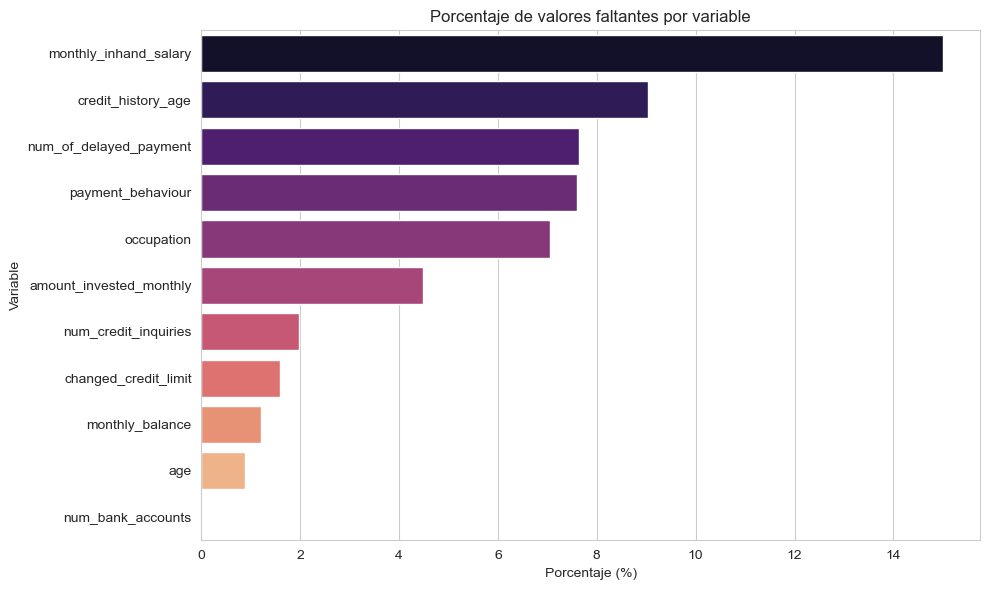

In [39]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Variable': missing.index, 'Porcentaje': missing_percent})
missing_df = missing_df[missing_df['Porcentaje'] > 0].sort_values(by='Porcentaje', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df, x='Porcentaje', y='Variable', palette='magma')
plt.title("Porcentaje de valores faltantes por variable")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

#### 2.2.4 Imputación de datos faltantes

En esta sección se realizaremos la imputación de datos faltantes tanto de las variables categóricas `payment_behaviour` y `occupation`, como de las variables numéricas ya mencionadas.

Empecemos primero con la imputación de las categóricas. Para estas dos se realizará el mismo proceso que se hizo con la variable `Type_of_Loan` en la sección de corrección de los datos, es decir, una imputación por hot deck y su correspondiente evaluación con la prueba chi-cuadrado.

In [40]:
df_imputed = df.copy()

In [41]:
df_imputed['payment_behaviour'] = hot_deck_group(df_imputed, 'payment_behaviour', 'credit_mix')

In [42]:
df_imputed['occupation'] = hot_deck_group(df_imputed, 'occupation', 'credit_mix')

In [43]:
eval_cat(df,df_imputed,"payment_behaviour")

=== payment_behaviour ===
Chi2 = 0.131, gl = 5, p = 0.9997 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


In [44]:
eval_cat(df,df_imputed,"occupation")

=== occupation ===
Chi2 = 0.672, gl = 14, p = 1.0000 →  No se rechaza H0 (distribuciones iguales)
------------------------------------------------------------


Dado que el p-valor en ambas pruebas es mayor al nivel de significancia, no hay evidencia suficiente para rechazar la igualdad de distribuciones de las variables antes y después de su imputación.

Ahora, realizemos una imputación de los valores faltantes utilizando un modelo k-NN.

Para poder usar la imputación por medio de un modelo k-NN, debemos hacer un preprocesamiento de los datos, es decir, vamos a estandarizar las variables numéricas.

In [45]:

#Separar numéricas, categóricas y target
X_num = df_imputed[num_cols]
X_cat = df_imputed[cat_cols]
y = df_imputed['credit_score']

#Escalar numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

Luego, usamos `KNNImputer()` para imputar las variables numéricas.

In [46]:
from sklearn.impute import KNNImputer
# Imputación por KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_num_imputed_scaled = knn_imputer.fit_transform(X_num_scaled)


Y al finalizar la imputación, debemos reconstruir el dataframe para poder seguir con el análisis exploratorio de datos.

In [47]:

#Separamos de nuevo para revertir escalado y codificación
X_num_imputed = scaler.inverse_transform(X_num_imputed_scaled)

df_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)
df_final = pd.concat([df_num_imputed, X_cat.reset_index(drop=True)], axis=1)
df_final['credit_score'] = y.values

#### 2.2.5 Evaluación de la imputación

Revisamos que la imputación se haya realizado correctamente:

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   annual_income             100000 non-null  float64
 2   monthly_inhand_salary     100000 non-null  float64
 3   num_bank_accounts         100000 non-null  float64
 4   num_credit_card           100000 non-null  float64
 5   interest_rate             100000 non-null  float64
 6   delay_from_due_date       100000 non-null  float64
 7   num_of_delayed_payment    100000 non-null  float64
 8   changed_credit_limit      100000 non-null  float64
 9   num_credit_inquiries      100000 non-null  float64
 10  outstanding_debt          100000 non-null  float64
 11  credit_utilization_ratio  100000 non-null  float64
 12  credit_history_age        100000 non-null  float64
 13  total_emi_per_month       100000 non-null  fl

Gracias a `info()` descubrimos que los valores faltantes fueron imputados. Ahora, evaluemos la imputación por medio de pruebas analíticas.

Dado que usamos `KNNImputer` para la imputación, debemos devolver a su estado original a las variables que no debían ser imputadas, ya que usando este método nos dimos cuenta que ciertos registros de las variables que no necesitaban imputación se modificaban.

In [49]:
imputed_vars=['monthly_inhand_salary', 'credit_history_age','num_of_delayed_payment',
              'amount_invested_monthly', 'num_credit_inquiries','changed_credit_limit',
              'monthly_balance','age', 'num_bank_accounts']


In [50]:
for col in num_cols:
    if col not in imputed_vars:
        df_final[col]=df[col]

Luego de esto, se implementa la función `eval_num` que incluye pruebas de normalidad y de igualdad de distribuciones como prueba la tstudent o prueba la Mann-Whitney U:

In [51]:
from scipy.stats import shapiro
def eval_num(df,df_imputado, col, alpha=0.05):

    #Pruebas de normalidad
    x = df[col].dropna()
    y = df_imputado[col]
    
    print(f"\nAnálisis estadístico para {col}:")
    print(f"Instancias sin NA en el dataset original: {len(x)}, Instancias sin NA en el dataset imputado: {len(y)}")
    
    sh_x = shapiro(x)
    sh_y = shapiro(y)
    normal_x = sh_x.pvalue > alpha
    normal_y = sh_y.pvalue > alpha

    print(f"Shapiro original: W={sh_x.statistic:.3f}, p={sh_x.pvalue:.4f} -> {'Normal' if normal_x else 'No normal'}")
    print(f"Shapiro imputado: W={sh_y.statistic:.3f}, p={sh_y.pvalue:.4f} -> {'Normal' if normal_y else 'No normal'}")

    if normal_x and normal_y:
        from scipy.stats import ttest_ind
        tt = ttest_ind(x, y, equal_var=False)
        print(f"T de Student (Welch): t={tt.statistic:.3f}, p={tt.pvalue:.4f} -> "
              f"{'Sin diferencia' if tt.pvalue>alpha else 'Diferencia significativa'}")
    else:
        from scipy.stats import mannwhitneyu
        mu = mannwhitneyu(x, y, alternative="two-sided")
        print(f"Mann–Whitney U: U={mu.statistic:.3f}, p={mu.pvalue:.4f} -> "
              f"{'Sin diferencia' if mu.pvalue>alpha else 'Diferencia significativa'}")




Y evaluamos las imputaciones realizadas:

In [52]:
for col in imputed_vars:
    eval_num(df,df_final, col)


Análisis estadístico para monthly_inhand_salary:
Instancias sin NA en el dataset original: 84998, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.883, p=0.0000 -> No normal
Shapiro imputado: W=0.880, p=0.0000 -> No normal
Mann–Whitney U: U=4254263400.000, p=0.7031 -> Sin diferencia

Análisis estadístico para credit_history_age:
Instancias sin NA en el dataset original: 90970, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.976, p=0.0000 -> No normal
Shapiro imputado: W=0.978, p=0.0000 -> No normal
Mann–Whitney U: U=4537058902.000, p=0.3417 -> Sin diferencia

Análisis estadístico para num_of_delayed_payment:
Instancias sin NA en el dataset original: 92354, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.064, p=0.0000 -> No normal
Shapiro imputado: W=0.067, p=0.0000 -> No normal
Mann–Whitney U: U=4628820660.000, p=0.3602 -> Sin diferencia

Análisis estadístico para amount_invested_monthly:
Instancias sin NA en el datas

Como podemos ver en la salida, no existe diferencia significativa entre las variables imputadas antes y después de su imputación, salvo por las variables `num_credit_inquiries` y `amount_invested_monthly`, por lo que hay que buscar otro método de imputación para estas.

Dado que ambas tienen un bajo porcentaje de valores faltantes, realicemos una imputación por la mediana.

In [53]:
df_final["num_credit_inquiries"]= df["num_credit_inquiries"].fillna(df["num_credit_inquiries"].median())

In [54]:
df_final["amount_invested_monthly"]= df["amount_invested_monthly"].fillna(df["amount_invested_monthly"].median())

In [55]:
eval_num(df, df_final, "num_credit_inquiries")


Análisis estadístico para num_credit_inquiries:
Instancias sin NA en el dataset original: 98035, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.102, p=0.0000 -> No normal
Shapiro imputado: W=0.101, p=0.0000 -> No normal
Mann–Whitney U: U=4894911800.000, p=0.5897 -> Sin diferencia


In [56]:
eval_num(df, df_final, "amount_invested_monthly")


Análisis estadístico para amount_invested_monthly:
Instancias sin NA en el dataset original: 95521, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.742, p=0.0000 -> No normal
Shapiro imputado: W=0.733, p=0.0000 -> No normal
Mann–Whitney U: U=4776050000.000, p=1.0000 -> Sin diferencia


Como el p-valor en ambos casos es mayor a mi nivel de significancia, no existe diferencia significativa en las variables antes y despúes de la imputación, por lo que podemos continuar con el EDA.

Veamos de nuevo un resumen numérico luego de imputar:

In [57]:
print("\nResumen de las variables numéricas:")
display(df_final[num_cols].describe().T)


Resumen de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,116.069316,6.843945e+02,14.000000,25.000000,33.000000,42.000000,8.698000e+03
annual_income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
monthly_inhand_salary,100000.0,4151.661894,3.121184e+03,303.645417,1661.722917,3068.619167,5881.567354,1.520463e+04
num_bank_accounts,100000.0,17.092280,1.174047e+02,0.000000,3.000000,6.000000,7.000000,1.798000e+03
num_credit_card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
interest_rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
num_of_delayed_payment,100000.0,31.019776,2.196367e+02,0.000000,9.000000,14.000000,18.000000,4.397000e+03
changed_credit_limit,100000.0,10.345331,6.708848e+00,0.000000,5.270000,9.330000,14.700000,3.697000e+01
num_credit_inquiries,100000.0,27.326780,1.912938e+02,0.000000,3.000000,6.000000,9.000000,2.597000e+03


Luego de la imputación de valores faltantes, vayamos ahora a un análisis gráfico de las variables.

### 2.3. Visualización de la variable objetivo(`credit_score`)
Ahora nos vamos a enfocar en cada variable por separado. Empezamos por la variable más importante: `credit_score`, que nos dice si la puntuación crediticia de una persona es buena (`good`), normal (`standard`), o pobre (`poor`).

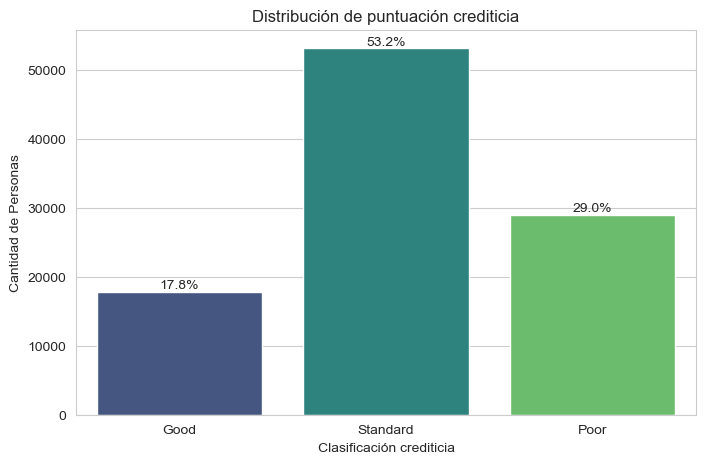

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


In [58]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='credit_score', data=df_final, palette='viridis')
plt.title('Distribución de puntuación crediticia')
plt.xlabel('Clasificación crediticia')
plt.ylabel('Cantidad de Personas')

total = len(df_final['credit_score'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print(df_final['credit_score'].value_counts())

En esta visualización podemos ver:

-   **Desequilibrio del conjunto de datos:** En el gráfico de barras se ve que nuestro conjunto de datos está desequilibrado.
-   **Proporción de clases:** Encontramos que el 17.8% de los individuos (`17,828`) pertenecen a la clase "Good", el 53.2% (`53,174`) pertenecen a la clase "Standard", y el 29% (`28998`) pertenecen a la clase "Poor".

### 2.4  Análisis univariado de las variables numéricas

Para las variables numéricas (como edad, ingreso anual, etc.), vamos a usar dos tipos de gráficos:
- **Histogramas:** para ver la "forma" de los datos y dónde se concentran más.
- **Diagramas de caja :** para ver qué tan dispersos están los datos y si hay valores "atípicos" o muy extremos.

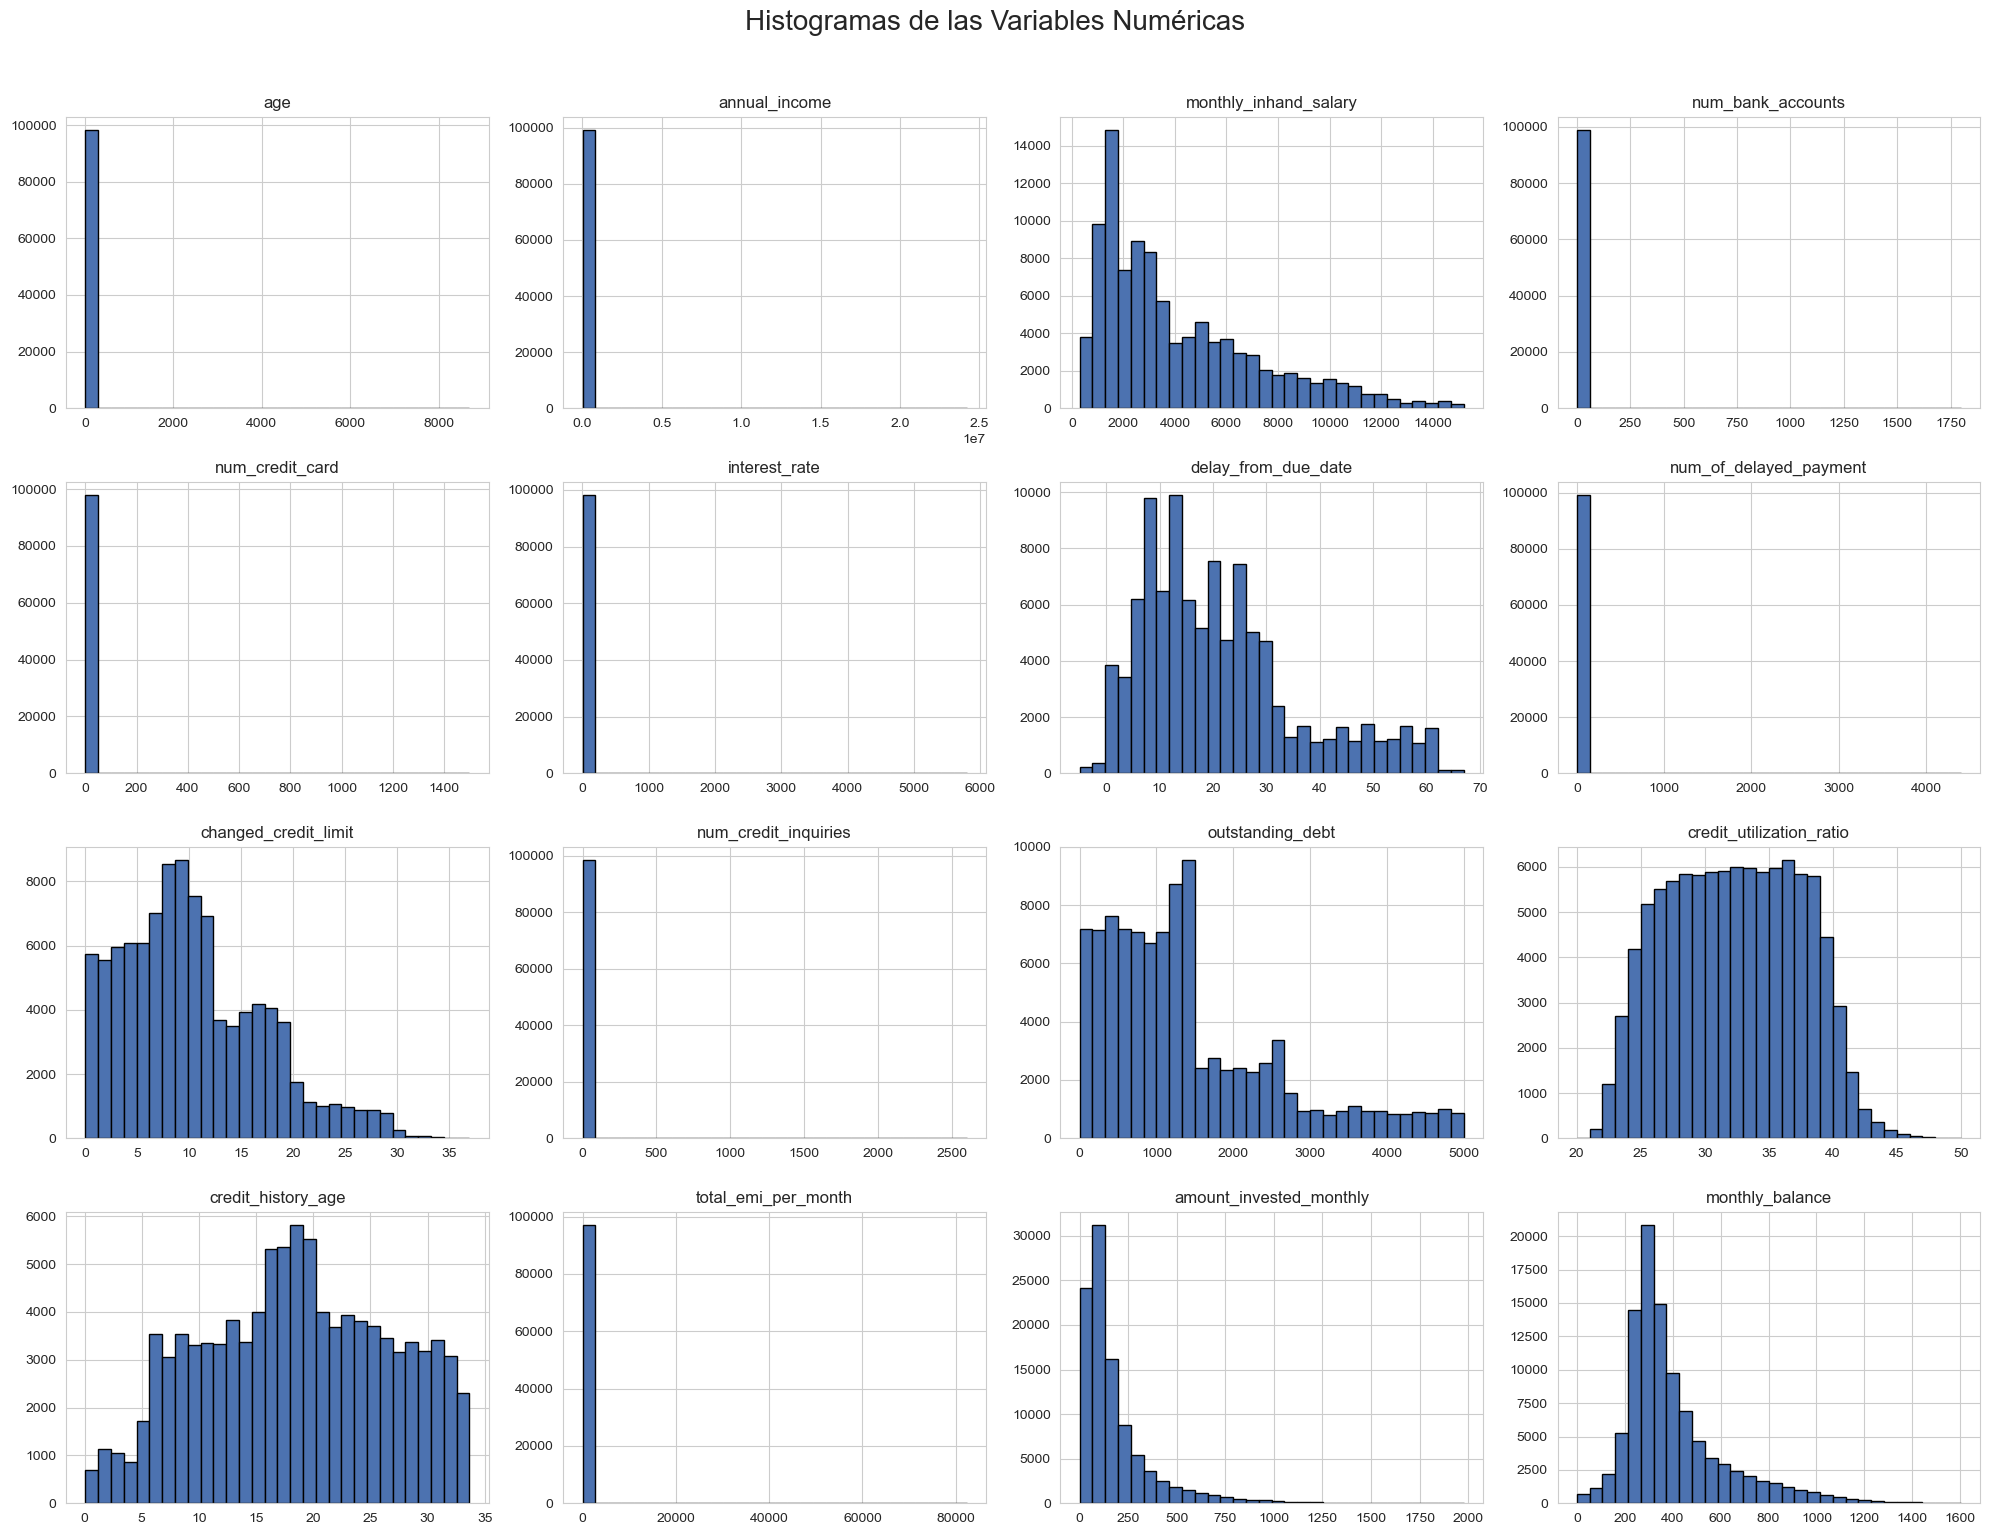

In [59]:
df_final[num_cols].hist(bins=30, figsize=(20, 15), layout=(-1, 4), edgecolor='black')
plt.suptitle('Histogramas de las Variables Numéricas', size=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


El análisis de histogramas proporciona una vista general del comportamiento estadístico de las variables numéricas, permitiéndonos detectar patrones, sesgos y posibles anomalías en los datos. A partir del gráfico anterior, extraemos los siguientes hallazgos:

- **Distribuciones Asimétricas (Sesgadas a la Derecha):** Estas variables presentan una concentración de observaciones en valores bajos y una cola larga hacia la derecha. En tales casos, la mediana puede ser una mejor medida de tendencia central: **`changed_credit_limit`**, **`outstanding_debt`**, **`monthly_balance`**, **`delay_from_due_date`**, **`monthly_inhand_salary`**: Este comportamiento es común en métricas que tienen un límite inferior natural (cero) y pocos casos con valores muy altos. Su transformación (como logaritmos) podría ayudar en ciertos modelos.

- **Variables con histogramas sesgados por valores atípicos:** Como ya lo vimos en el análisis del `describe()`, variables como `age`,`annual_income`, `num_bank_account`, `interest_rate`, `num_credit_card`, `num_of_delayed_payment`, `num_credit_inquiries` y `total_emi_per_month` tienen valores atípicos muy grandes, lo cual afecta la distribución del histograma de cada una de ellas.

Los outliers que representan errores en los registros de los datos, deben ser tratados y/o imputados, ya que son valores imposibles que no deberían estar ahí. Mientras que valores extremos en variables que representen salarios o dinero, no necesariamente deben representar valores errados, mientras no sean números exagerados.

Demos un primer vistazo a los outliers por medio de boxplots:

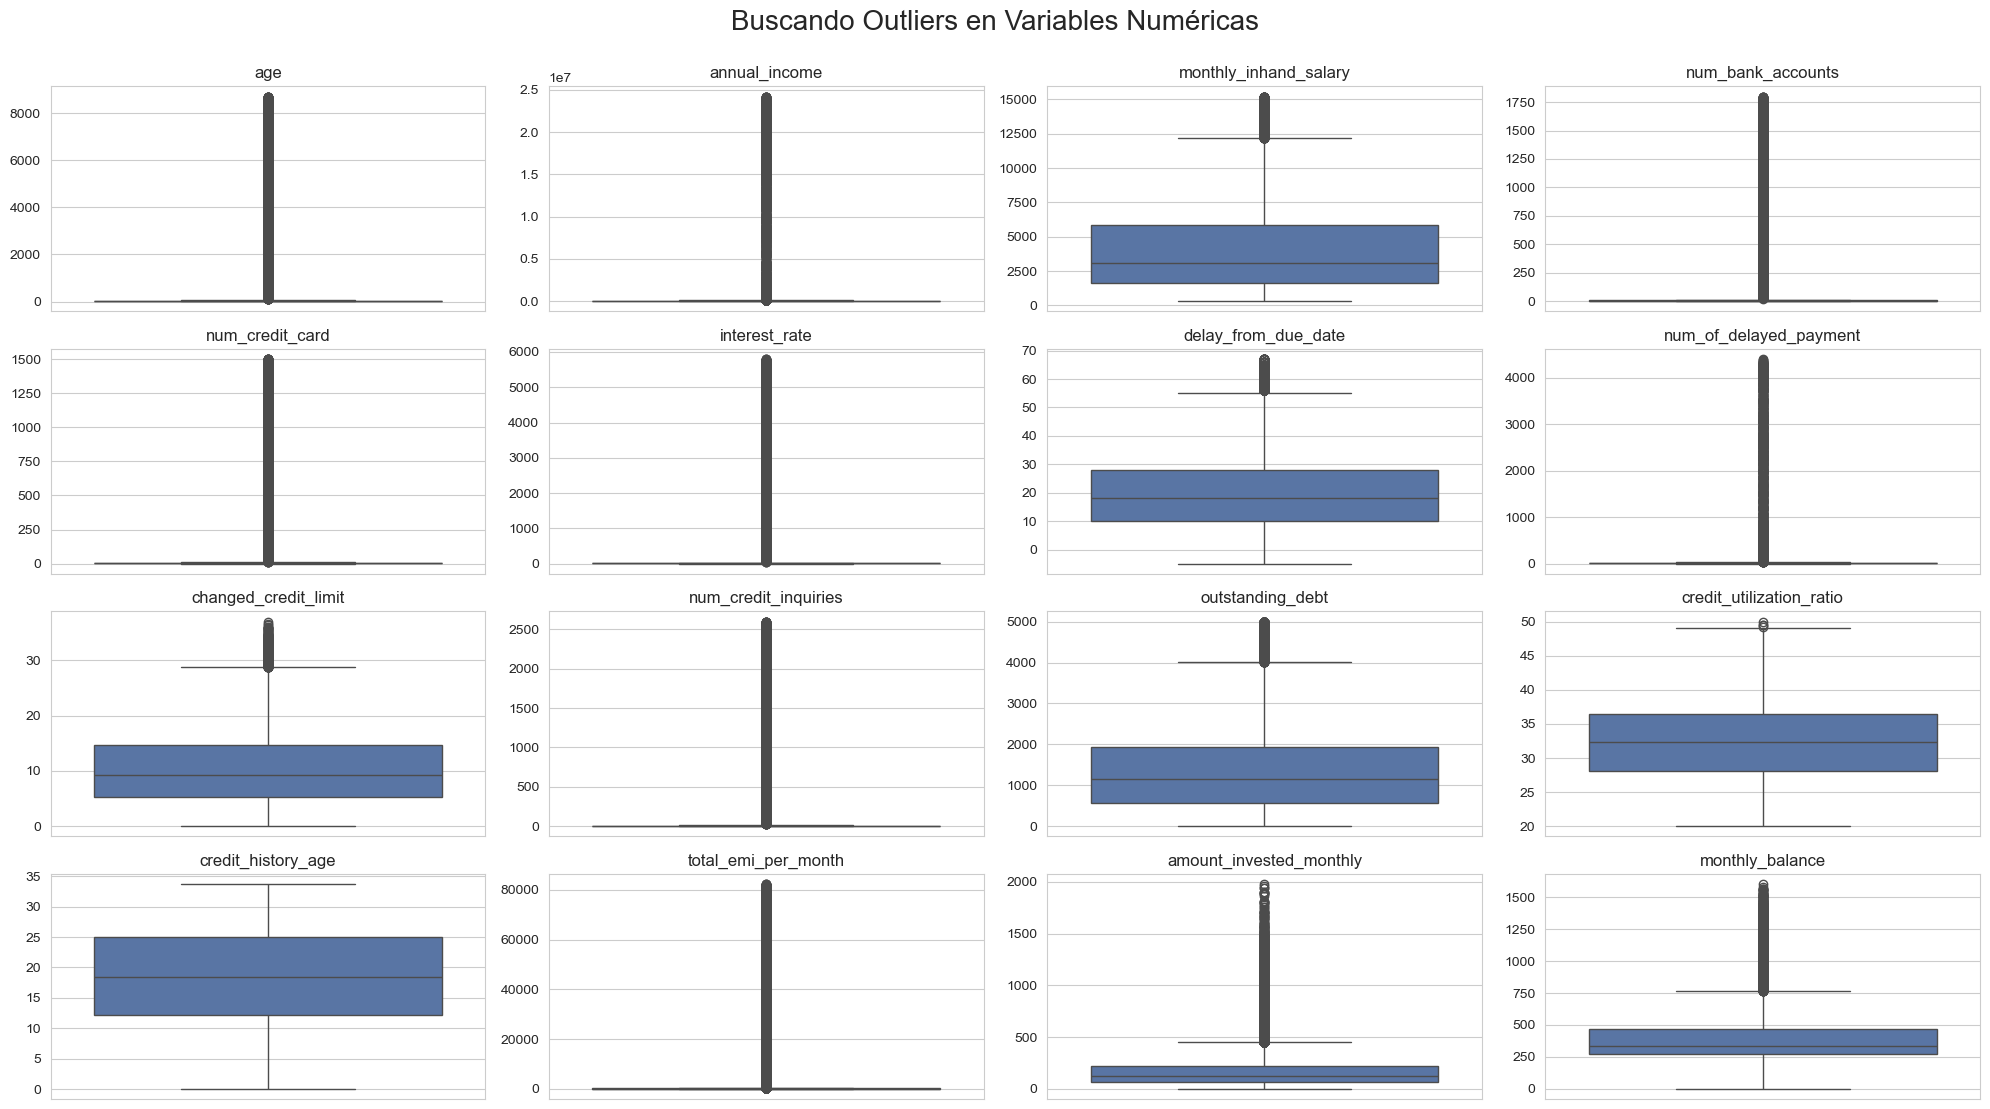

In [60]:
plt.figure(figsize=(20, 12))
plt.suptitle('Buscando Outliers en Variables Numéricas', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_final[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Veamos ahora un análisis de los boxplots de las variables numéricas:

**Presencia Generalizada de Outliers:**  

Como se vió en los histogramas, las variables `age`,`annual_income`, `num_bank_account`, `interest_rate`, `num_credit_card`, `num_of_delayed_payment`, `num_credit_inquiries` y `total_emi_per_month` no se visualizan correctamente debido a lo extremo que son los outliers en cada una de estas.

Además, variables como `credit_history_age` y `credit_utilization_ratio` muestran boxplots más compactos, con muy baja presencia de outlieers. Esto sugiere que sus datos están distribuidos de manera más uniforme y dentro de rangos biológicamente esperados, por lo que no se requiere tratamiento especial para valores extremos.

Como ya hemos venido comentando, es **crucial** corregir los valores atípicos que correspondan a errores en el registro de los datos, así que decidimos implementar la función `detectar_outliers_iqr` para ver primero la cantidad de atípicos que encontramos. Y luego por medio de una winsorización, que varía dependiendo de qué tan asimétrica sea la variable, se realiza una imputación de los valores más extremos que consideramos errores en los datos.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Función para detectar outliers usando IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((serie < lower) | (serie > upper))

# Contar outliers por variable
print("Conteo de outliers por variable numérica:")
for col in num_cols:
    outliers = detectar_outliers_iqr(df_final[col])
    print(f"{col}: {outliers.sum()} outliers detectados")

# Crear copia del dataset y aplicar winsorización (1% y 99%) a las variables numéricas
df_winsor = df_final.copy()
for col in num_cols:
    skew = df_final[col].skew()
    if abs(skew) > 2:
        limits = [0.02, 0.02]  
    elif abs(skew) > 1:
        limits = [0.01, 0.01]
    else:
        limits = [0.005, 0.005]
    df_winsor[col] = winsorize(df_final[col], limits=limits)




Conteo de outliers por variable numérica:
age: 1966 outliers detectados
annual_income: 2783 outliers detectados
monthly_inhand_salary: 2115 outliers detectados
num_bank_accounts: 1315 outliers detectados
num_credit_card: 2271 outliers detectados
interest_rate: 2034 outliers detectados
delay_from_due_date: 4002 outliers detectados
num_of_delayed_payment: 1014 outliers detectados
changed_credit_limit: 957 outliers detectados
num_credit_inquiries: 1650 outliers detectados
outstanding_debt: 5272 outliers detectados
credit_utilization_ratio: 4 outliers detectados
credit_history_age: 0 outliers detectados
total_emi_per_month: 6795 outliers detectados
amount_invested_monthly: 8703 outliers detectados
monthly_balance: 7671 outliers detectados


Es importante realizar de nuevo una evaluación de esta winsorización para verificar que no existan diferencias en las variables antes y después de este proceso:

In [62]:
for col in num_cols:
    eval_num(df_final, df_winsor, col)


Análisis estadístico para age:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.109, p=0.0000 -> No normal
Shapiro imputado: W=0.970, p=0.0000 -> No normal
Mann–Whitney U: U=5000673386.500, p=0.9584 -> Sin diferencia

Análisis estadístico para annual_income:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.074, p=0.0000 -> No normal
Shapiro imputado: W=0.873, p=0.0000 -> No normal
Mann–Whitney U: U=5000002000.500, p=0.9999 -> Sin diferencia

Análisis estadístico para monthly_inhand_salary:
Instancias sin NA en el dataset original: 100000, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.880, p=0.0000 -> No normal
Shapiro imputado: W=0.880, p=0.0000 -> No normal
Mann–Whitney U: U=5000000000.000, p=1.0000 -> Sin diferencia

Análisis estadístico para num_bank_accounts:
Instancias sin NA en el dataset original: 100000, Instan

Como vemos que no hay diferencia en ninguna variable, podemos continuar.

In [63]:

print("\nResumen estadístico tras winsorización:")
df_winsor[num_cols].describe().T


Resumen estadístico tras winsorización:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,33.777140,11.067517,15.000000,25.000000,33.000000,42.000000,56.000000
annual_income,100000.0,51606.195455,39612.875620,8137.625000,19457.500000,37578.610000,72790.920000,166837.640000
monthly_inhand_salary,100000.0,4145.066437,3096.530388,550.367917,1661.722917,3068.619167,5881.567354,13611.203333
num_bank_accounts,100000.0,5.429450,2.628537,0.000000,3.000000,6.000000,7.000000,10.000000
num_credit_card,100000.0,9.085470,23.802058,1.000000,4.000000,5.000000,7.000000,171.000000
interest_rate,100000.0,16.827500,18.145260,1.000000,8.000000,13.000000,20.000000,128.000000
delay_from_due_date,100000.0,21.069970,14.831528,-1.000000,10.000000,18.000000,28.000000,62.000000
num_of_delayed_payment,100000.0,13.505270,6.130876,1.000000,9.000000,14.000000,18.000000,25.000000
changed_credit_limit,100000.0,10.337939,6.685822,0.000000,5.270000,9.330000,14.700000,29.540000
num_credit_inquiries,100000.0,5.951190,4.000056,0.000000,3.000000,6.000000,9.000000,16.000000


Ahora podemos ver que ya no existen valores tan extremos en las variables numéricas que suponemos que representaban un error. Sin embargo, analizando más en detalle podemos ver que las variables `num_credit_card`, `interest_rate` y `total_emi_per_month` tienen valores irreales. Veamoslo en los boxplots nuevamente:

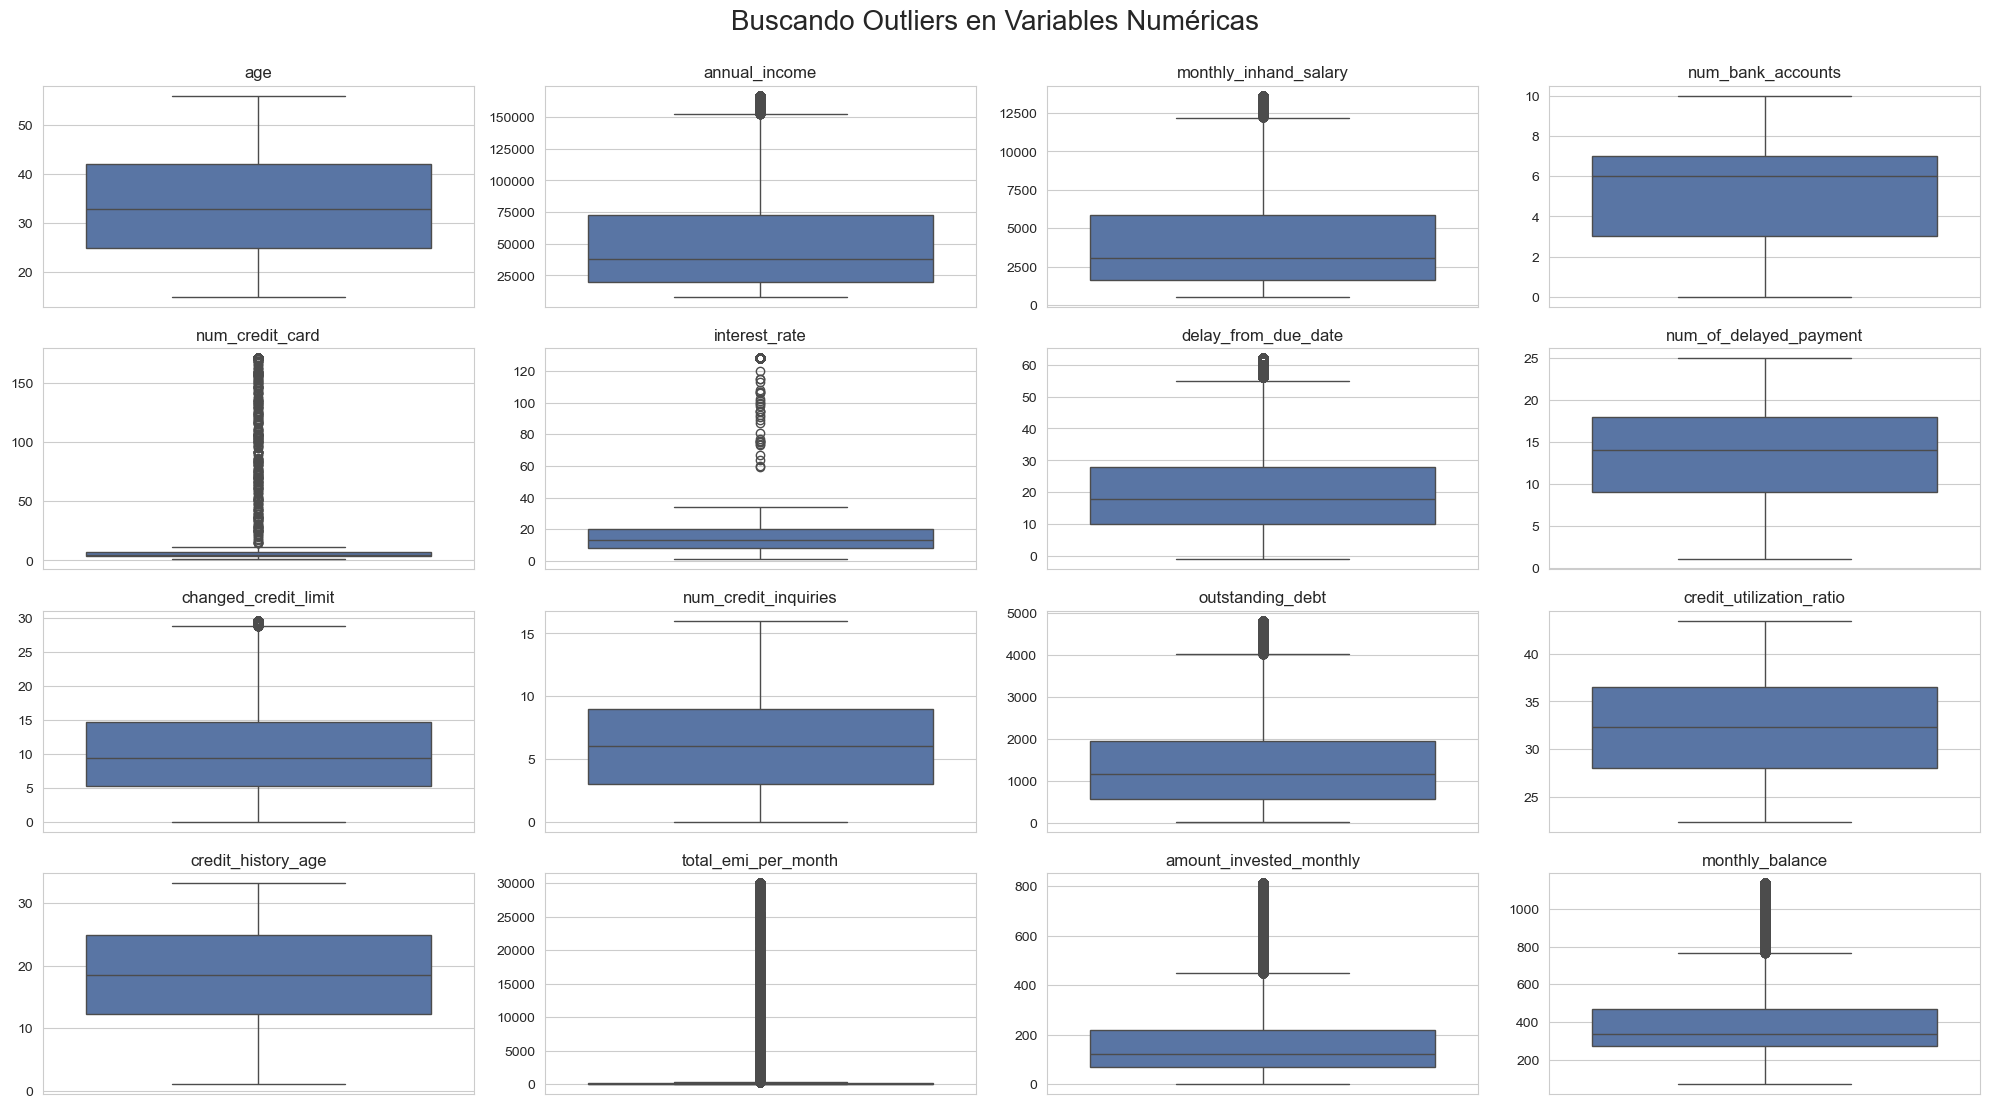

In [64]:
plt.figure(figsize=(20, 12))
plt.suptitle('Buscando Outliers en Variables Numéricas', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_winsor[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Entonces, los valores atípicos de estas 3 variables los trataremos como valores faltantes y realizaremos una nueva imputación de estos por k-NN.

In [65]:
def reemplazar_outliers_por_nan(df, columnas):
    df_sin_outliers = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 3 * IQR
        # Reemplaza solo los valores por encima del límite superior
        df_sin_outliers[col] = df[col].where(df[col] <= upper, np.nan)
        
    return df_sin_outliers

df_total=reemplazar_outliers_por_nan(df_winsor, ['num_credit_card', 'interest_rate', 'total_emi_per_month'])

In [66]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   annual_income             100000 non-null  float64
 2   monthly_inhand_salary     100000 non-null  float64
 3   num_bank_accounts         100000 non-null  float64
 4   num_credit_card           97734 non-null   float64
 5   interest_rate             97966 non-null   float64
 6   delay_from_due_date       100000 non-null  int64  
 7   num_of_delayed_payment    100000 non-null  float64
 8   changed_credit_limit      100000 non-null  float64
 9   num_credit_inquiries      100000 non-null  float64
 10  outstanding_debt          100000 non-null  float64
 11  credit_utilization_ratio  100000 non-null  float64
 12  credit_history_age        100000 non-null  float64
 13  total_emi_per_month       95730 non-null   fl

Ya que fueron cambiados correctamente esos valores atípicos por valores faltantes, realicemos la imputación de estos.

In [67]:

#Separar numéricas, categóricas y target
X_num = df_total[num_cols]
X_cat = df_total[cat_cols]
y = df_total['credit_score']

#Escalar numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

from sklearn.impute import KNNImputer
# Imputación por KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_num_imputed_scaled = knn_imputer.fit_transform(X_num_scaled)

#Separamos de nuevo para revertir escalado y codificación
X_num_imputed = scaler.inverse_transform(X_num_imputed_scaled)

df_num_imputed = pd.DataFrame(X_num_imputed, columns=num_cols)
df_real = pd.concat([df_num_imputed, X_cat.reset_index(drop=True)], axis=1)
df_real['credit_score'] = y.values

De nuevo, devolvemos a su estado original a las variables que no debieron cambiar de información:

In [68]:
for col in num_cols:
    if col not in ['num_credit_card', 'interest_rate', 'total_emi_per_month']:
        df_real[col]=df_winsor[col]

Y evaluemos esta imputación:

In [69]:
for col in ['num_credit_card', 'interest_rate', 'total_emi_per_month']:
    eval_num(df_total, df_real, col)


Análisis estadístico para num_credit_card:
Instancias sin NA en el dataset original: 97734, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.965, p=0.0000 -> No normal
Shapiro imputado: W=0.966, p=0.0000 -> No normal
Mann–Whitney U: U=4885919435.000, p=0.9504 -> Sin diferencia

Análisis estadístico para interest_rate:
Instancias sin NA en el dataset original: 97966, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.953, p=0.0000 -> No normal
Shapiro imputado: W=0.953, p=0.0000 -> No normal
Mann–Whitney U: U=4918742213.000, p=0.1076 -> Sin diferencia

Análisis estadístico para total_emi_per_month:
Instancias sin NA en el dataset original: 95730, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.848, p=0.0000 -> No normal
Shapiro imputado: W=0.852, p=0.0000 -> No normal
Mann–Whitney U: U=4754281314.500, p=0.0099 -> Diferencia significativa


Vemos que existe una diferencia significativa en las distribuciones de la variable `totaal_emi_per_month` antes y después de ser imputada, por lo que vamos a ver si una imputación por mediana no cambia esta distribución:

In [70]:
df_real["total_emi_per_month"]=df_total["total_emi_per_month"].fillna(df_total["total_emi_per_month"].median())

In [71]:
eval_num(df_total, df_real, "total_emi_per_month")


Análisis estadístico para total_emi_per_month:
Instancias sin NA en el dataset original: 95730, Instancias sin NA en el dataset imputado: 100000
Shapiro original: W=0.848, p=0.0000 -> No normal
Shapiro imputado: W=0.842, p=0.0000 -> No normal
Mann–Whitney U: U=4786491460.000, p=0.9995 -> Sin diferencia


Dado que ya no hay diferencia, hemos terminado la imputación de los outliers que signficaban un error en los datos. Veamos los boxplots finales:

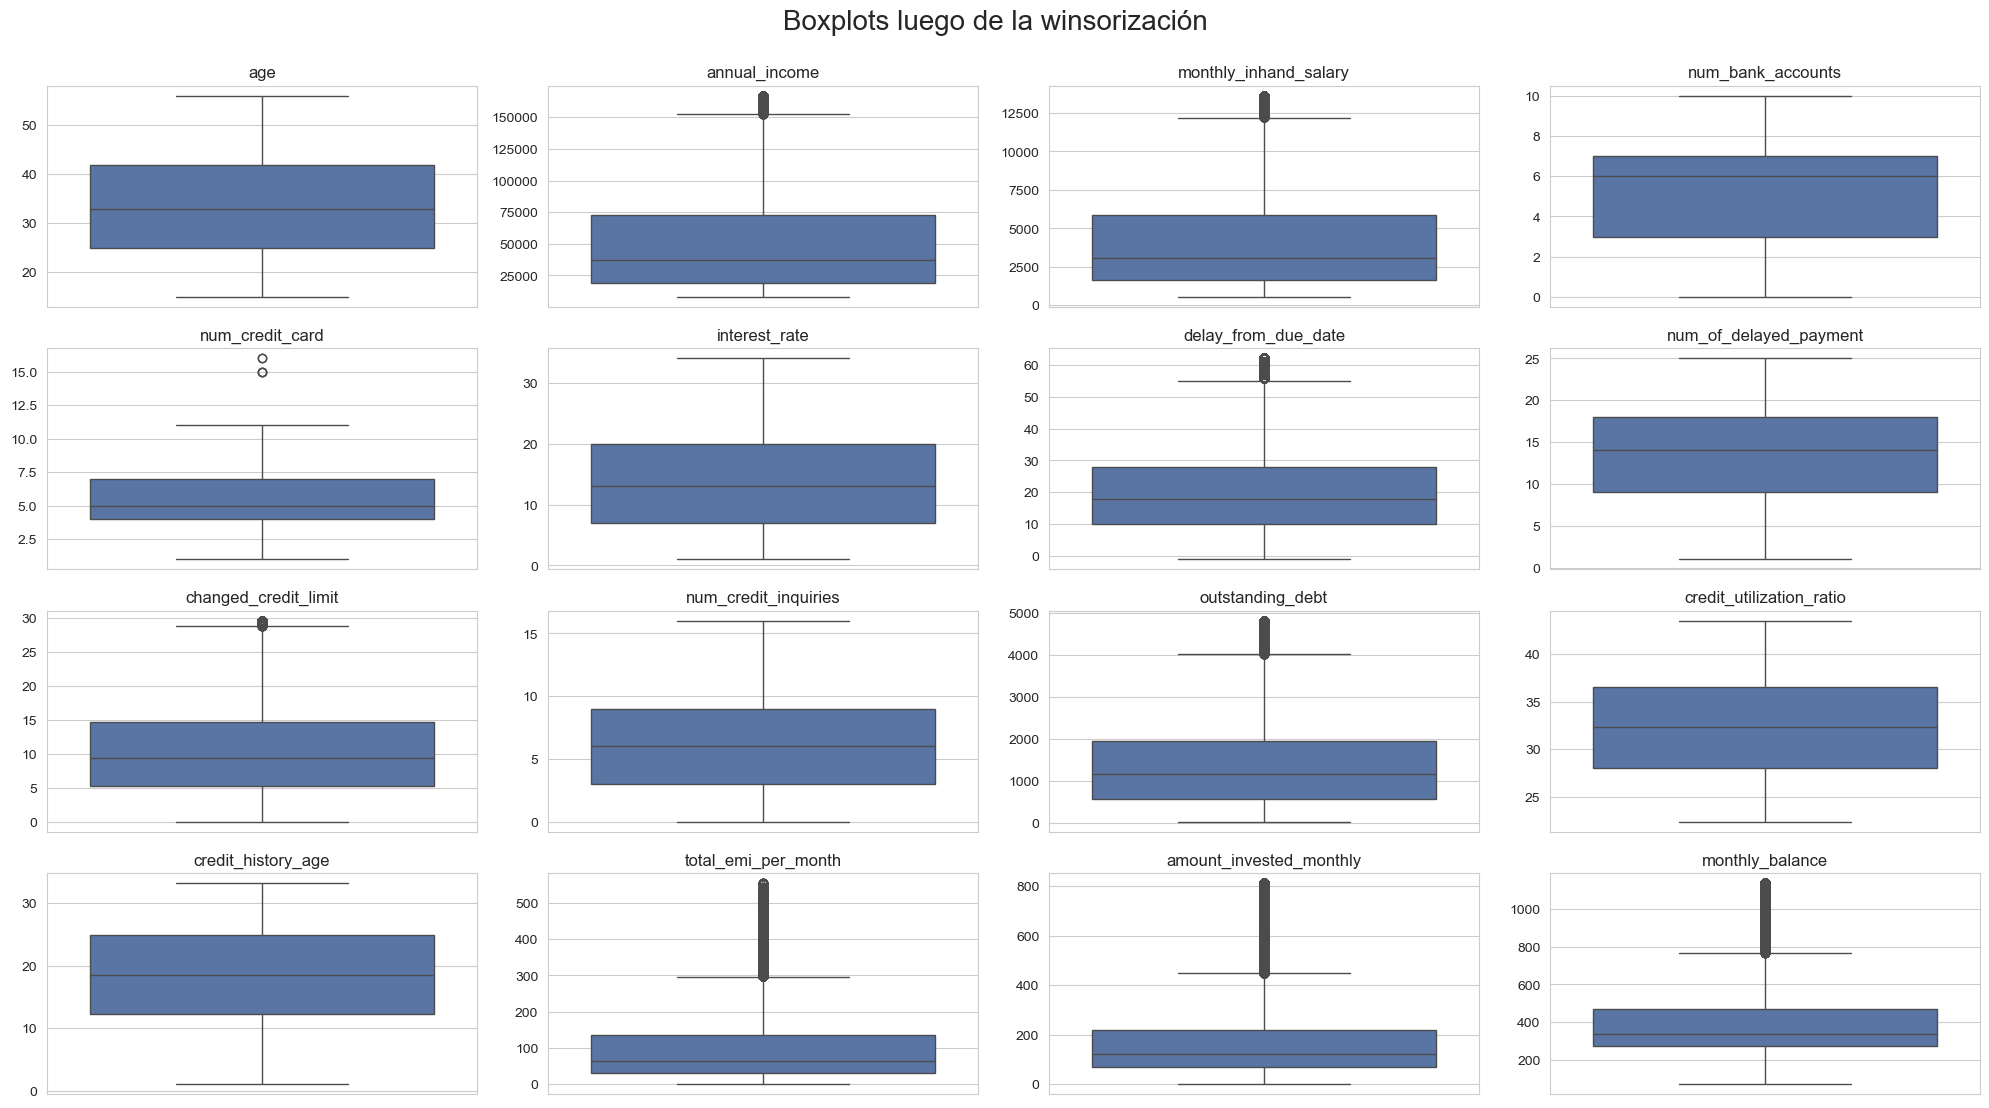

In [72]:
plt.figure(figsize=(20, 12))
plt.suptitle('Boxplots luego de la winsorización', size=20, y=0.95)


for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_real[col])
    plt.title(col)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Las variables que aún conservan atípicos las mantenemos de esa manera ya que estos atípicos no nos parecen un error en los datos y creemos que podrían estar en el rango real de sus respectivas variables.

### 2.5. Variables Numéricas vs. Target
Ahora vamos a empezar a cruzarlas de dos en dos. Nos interesa saber **cómo se relaciona cada característica con la variable `credit_score`**.

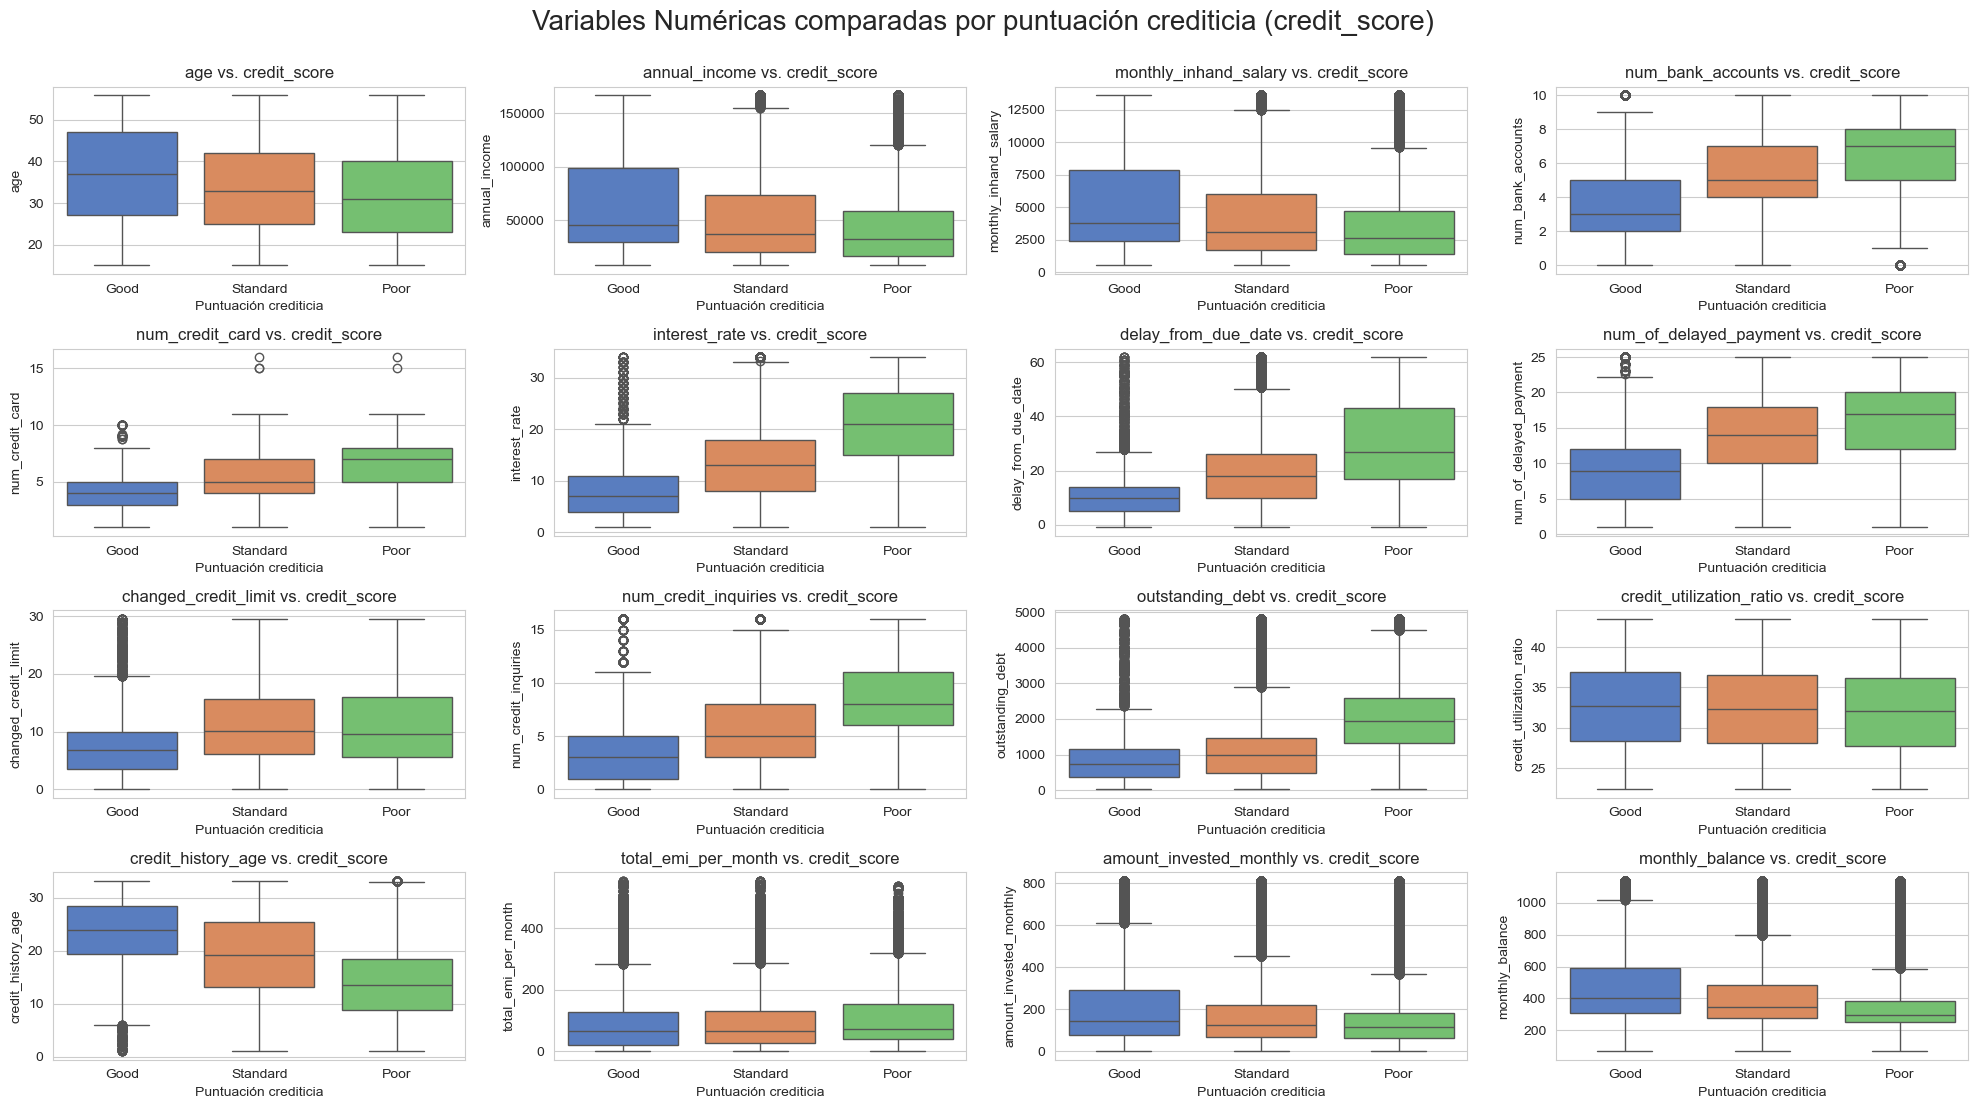

In [73]:

plt.figure(figsize=(20, 12))
plt.suptitle('Variables Numéricas comparadas por puntuación crediticia (credit_score)', size=20, y=0.95)

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='credit_score', y=col, data=df_real, palette='muted')
    plt.title(f'{col} vs. credit_score')
    plt.xlabel('Puntuación crediticia')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

De estas comparaciones podemos concluir lo siguiente:

- El grupo de personas con una clasificación `Good` tiende a tener una mayor edad que el resto de grupos. A su vez es más común que la empresa confíe en las personas con una vida crediticia más longeva.

- Por otro lado, el número de tarjetas de crédito, de cuentas bancarias, del valor de la tasa de interés, y de la deuda acumulada en la empresa emergen como buenos predictores de la clase `Poor`. 

- Por último, variables como `total_emi_per_month` y `credit_utilization_ratio` no parecen aportar información significativa para la separación de las clases.



### 2.6 Variables categóricas vs. Target

Ahora vamos a ver si alguna como varían las variables categóricas dependiendo del grupo de su score crediticio.

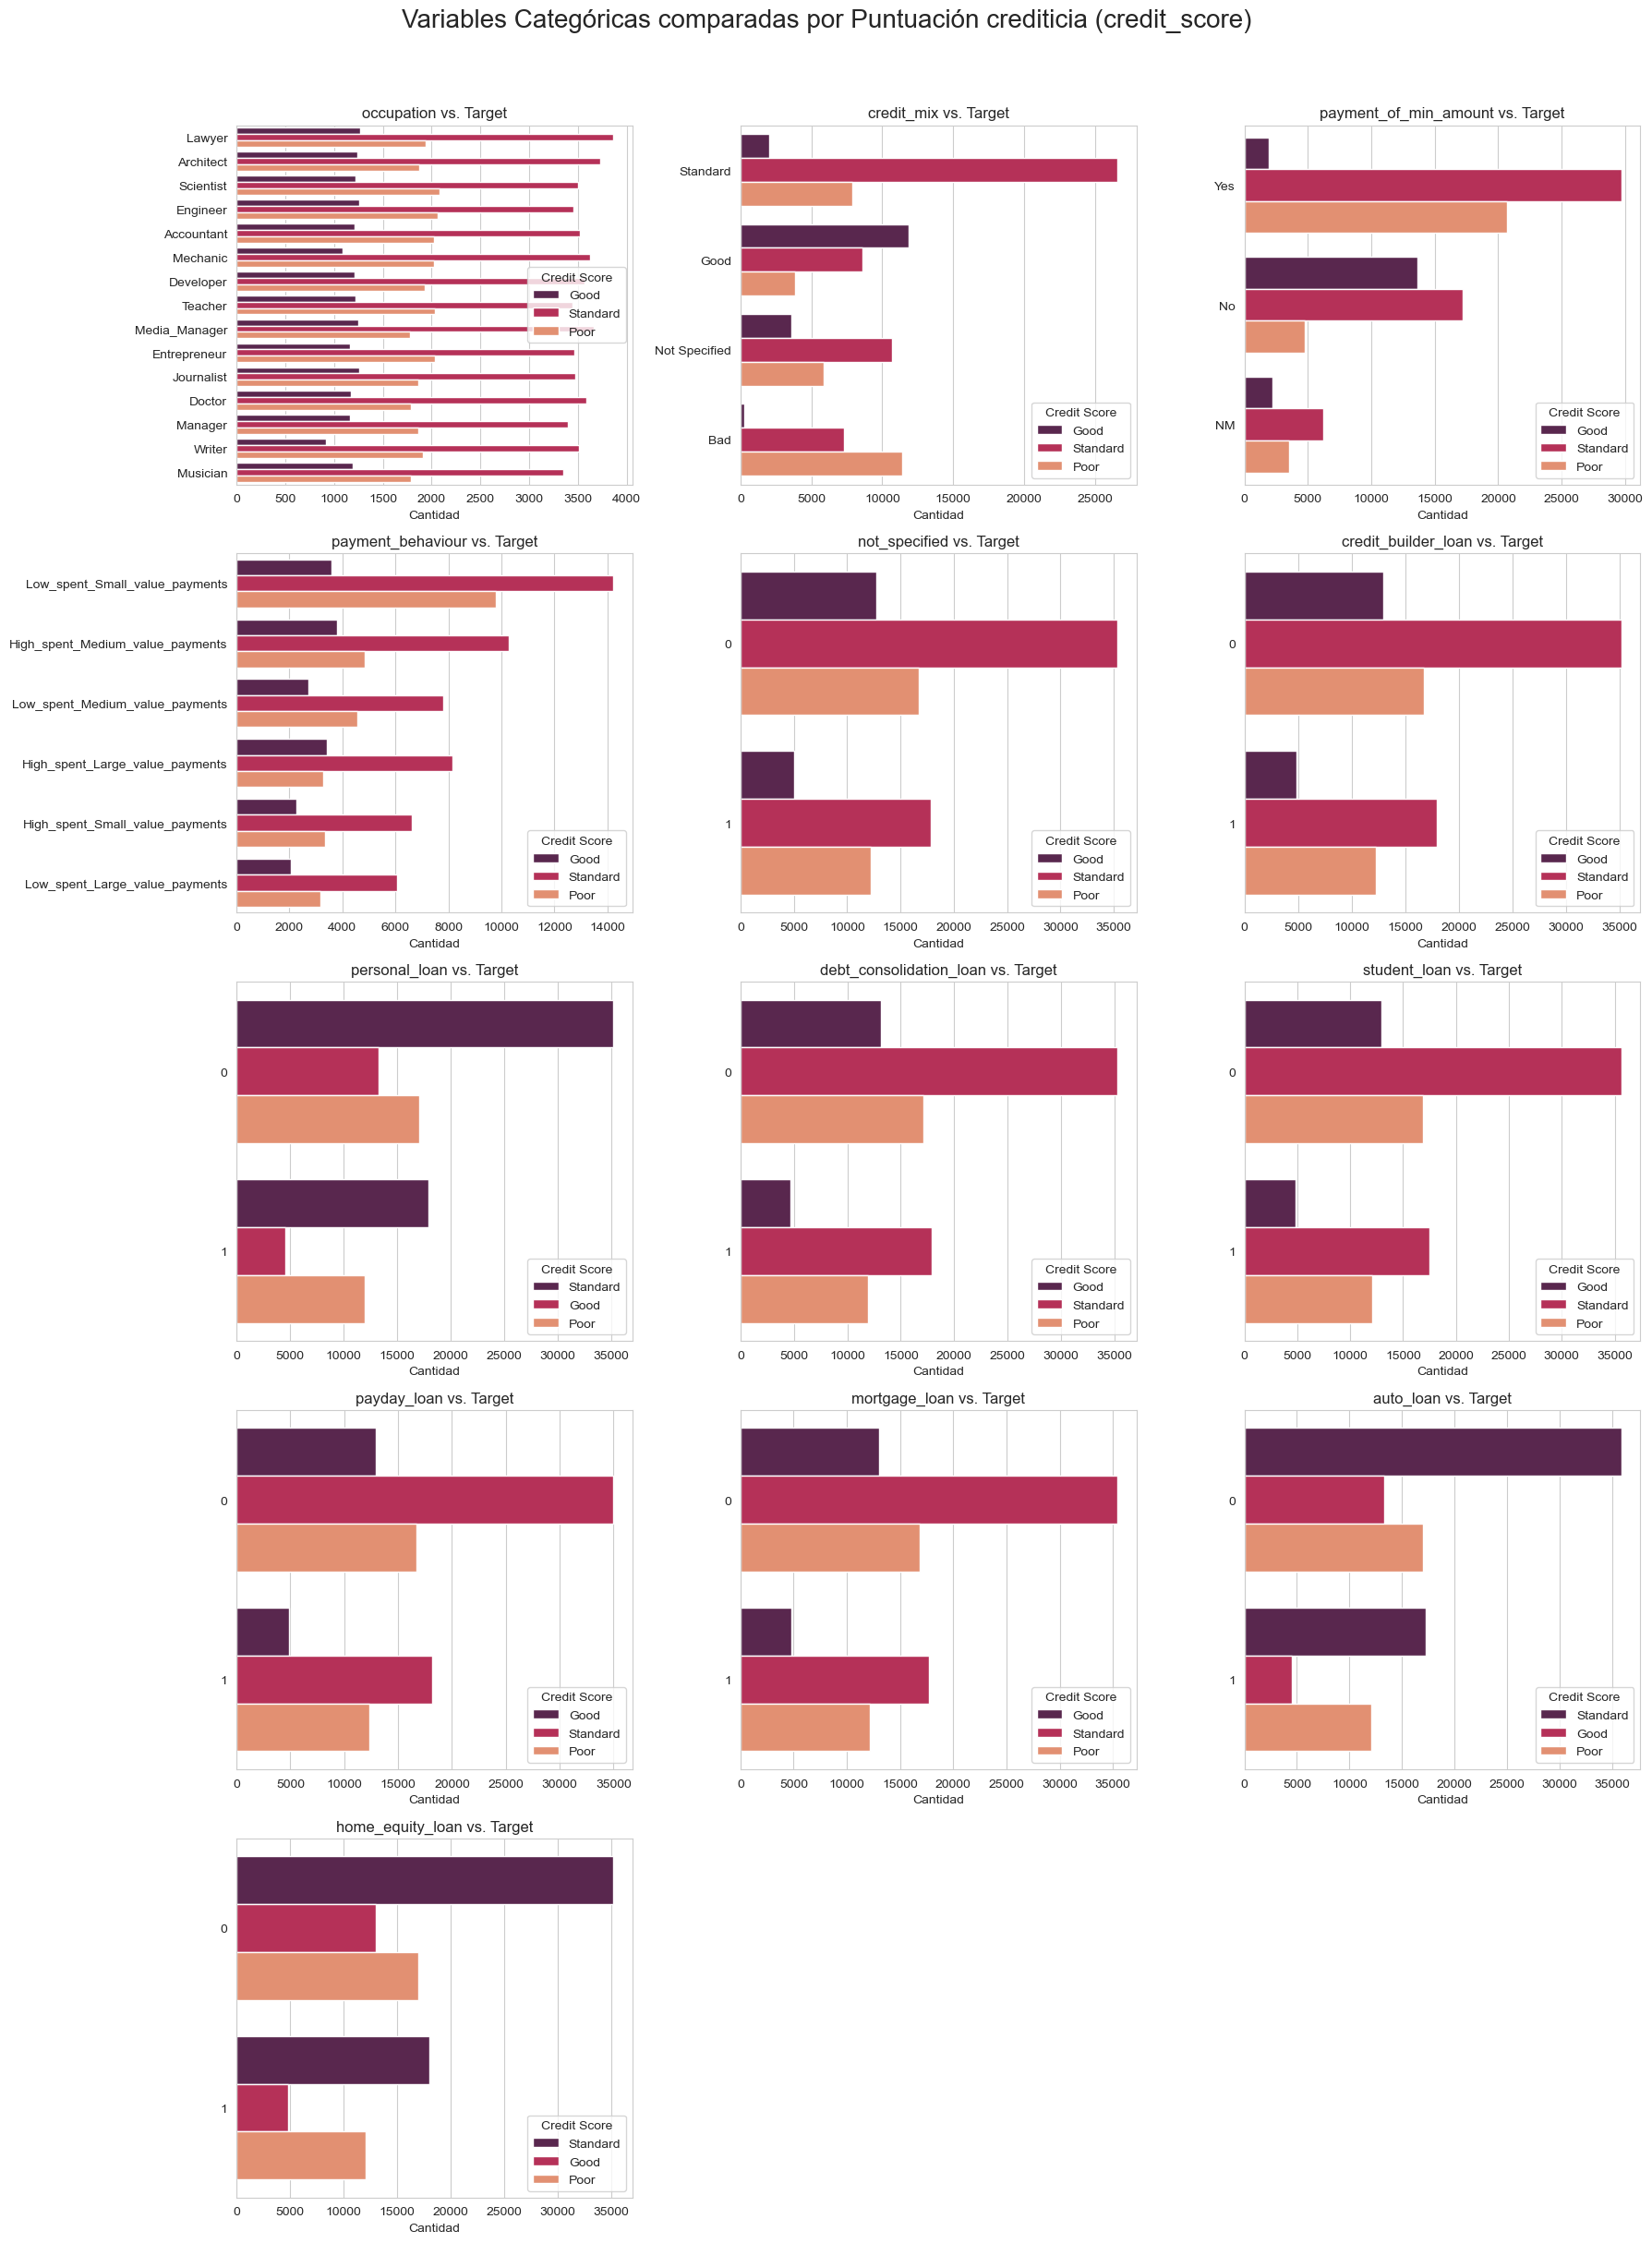

In [74]:

ncols = 3 

n_features = len(cat_cols)
nrows = (n_features + ncols - 1) // ncols

plt.figure(figsize=(18, nrows * 5))
plt.suptitle('Variables Categóricas comparadas por Puntuación crediticia (credit_score)', size=20, y=1.0)

for i, col in enumerate(cat_cols, 1):

    plt.subplot(nrows, ncols, i)
    sns.countplot(y=col, data=df_real, hue='credit_score', order=df_real[col].value_counts().index, palette='rocket')
    plt.title(f'{col} vs. Target')
    plt.xlabel('Cantidad')
    plt.ylabel('')
    plt.legend(title='Credit Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

De estos gráficos podemos concluir que, variables como `credit_mix`, `payment_behaviour` y `payment_of_min_amount` parecen ser las variables categóricas **clave** para la separación de clases, mientras que el resto no parecen mostraae tanta diferencia en las proporciones de las clases. 

### 2.7. Correlación
Realizaremos una matriz de correlación para revisar como se relacionan las variables numéricas entre sí.

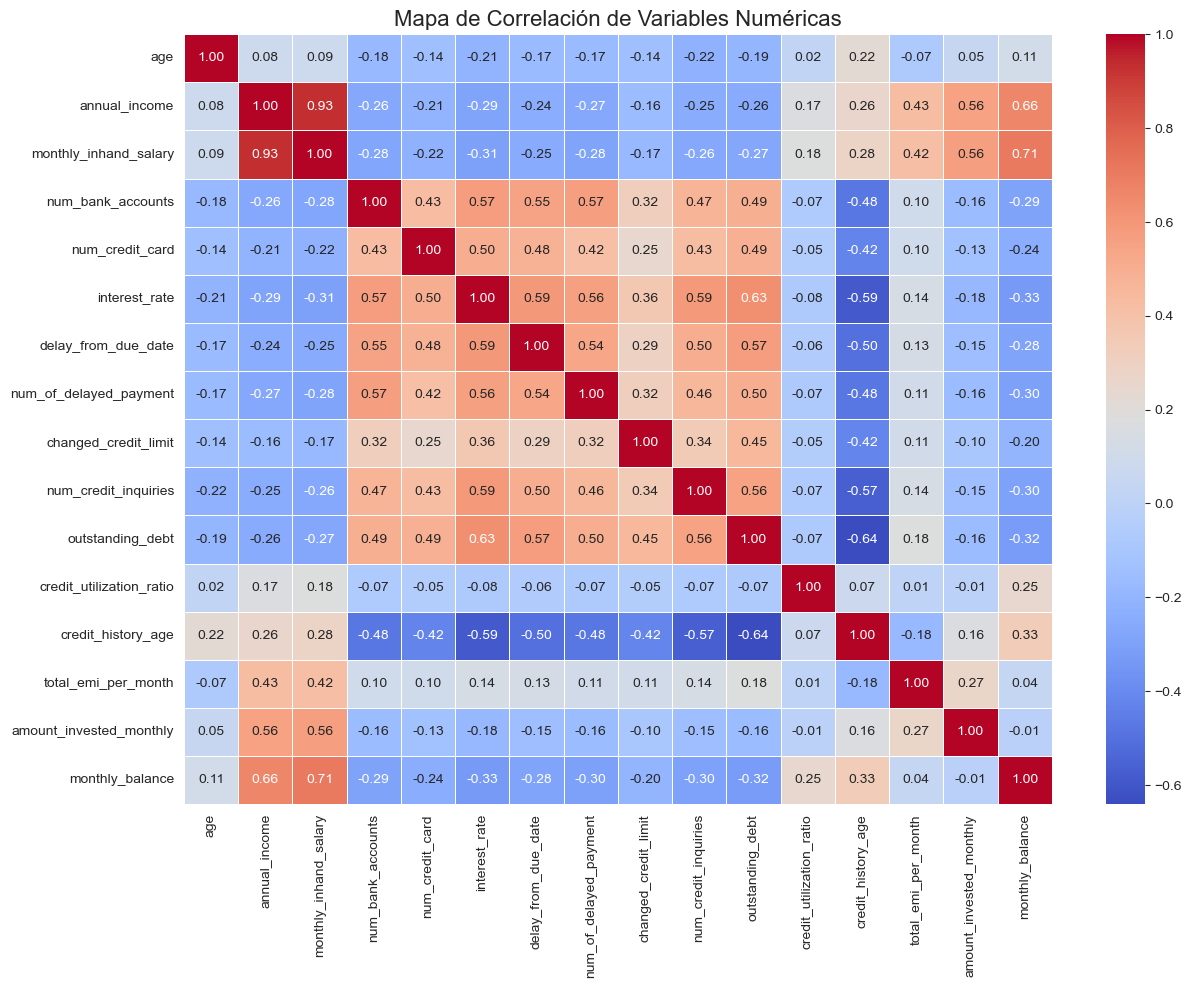

In [75]:
correlation_matrix = df_real[num_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación de Variables Numéricas', size=16)
plt.show()

Como podemos apreciar, existen relaciones algo fuertes que eran esperables debido a la naturaleza de los datos, como el monto de la cuenta del cliente (`monthly_balance`) y su ingreso anual (`annual_income`), o la deuda acumulada (`outstanding_debt`) y  la tasa de interés (`interest_rate`). Sin embargo estas variables las vamos a mantener ya que pueden ser clave para la separación de clases.

El único cambio que realizaremos será la eliminación de la variable `annual_income`, ya que tiene una correlación casi perfecta con la variable `monthly_inhand_salary`, y mantendremos esta última ya que explica de mejor manera la situación mensual de cada registro.

In [76]:
df_real=df_real.drop(columns="annual_income")

### 2.8. Conclusión del Análisis Exploratorio de Datos

Nuestro EDA nos ha proporcionado una comprensión esencial de nuestro conjunto de datos:

-   **Preprocesamiento Crucial:** Identificamos la necesidad de limpiar los datos. Encontramos valores nulos en varias columnas, datos inconsistentes (ej. valores negativos en la edad) y la presencia de outliers.
-   **Desafío del Target:** Confirmamos que la variable objetivo está desequilibrada (17.8% Good, 53.2% Standard, 29% Poor).
-   **Descubrimiento de Predictores:**  Variables como `credit_history_age`, `interest_rate`, `outstanding_debt`, `credit_mix` y `payment_of_min_amount` emergen como unos buenos predictores para los modelos.
-   **Correlación:** Notamos una correlación significativa en algunas variables relacionadas el ingreso de los individuos.

Para poder usar el dataframe tratado en el análisis exploratorio, lo almacenamos en un `.pkl` en nuestro computador.

In [77]:
df_real.to_pickle("data_limpia.pkl")     